In [11]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from scipy.stats import norm
    

In [12]:
filepath_hospital = "C:/Users/De/Documents/MDST_intro_tutorials/workshop 3/exploratory data analysis/HospitalAdmissionsData.csv";
hospital = pd.read_csv(filepath_hospital)

In [4]:
#3(a) Columns are as follows
hospital.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [5]:
#3(b) there is only 1 feature with float, and 4 features with integers
#3(c) as seen from below: Admssion_Type, Insurance_Type, Religion_Type, Race, Dx are objects
#3(d) it can be non-numeric variables but not null (None)
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
ID                     58863 non-null int64
AdmissionLengthDays    58863 non-null float64
Death_1                58863 non-null int64
Admission_Type         58863 non-null object
Insurance_Type         58863 non-null object
EnglishLanguage_1      58863 non-null int64
Religion_Type          58408 non-null object
Married_1              58863 non-null int64
Race                   58863 non-null object
Dx                     58863 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [6]:
#3(e)
hospital.AdmissionLengthDays.describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [7]:
#3(f) Most common admission type: emergency, Insurance type: medicare, Religion type: catholic, Race: white, Dx: Newborn

hospital.describe(include = 'object')

,Admission_Type,Insurance_Type,Religion_Type,Race,Dx
count,58863,58863,58408,58863,58863
unique,4,5,20,41,15647
top,emergency,medicare,catholic,white,newborn
freq,41987,28157,20561,40927,7823


<IPython.core.display.Javascript object>


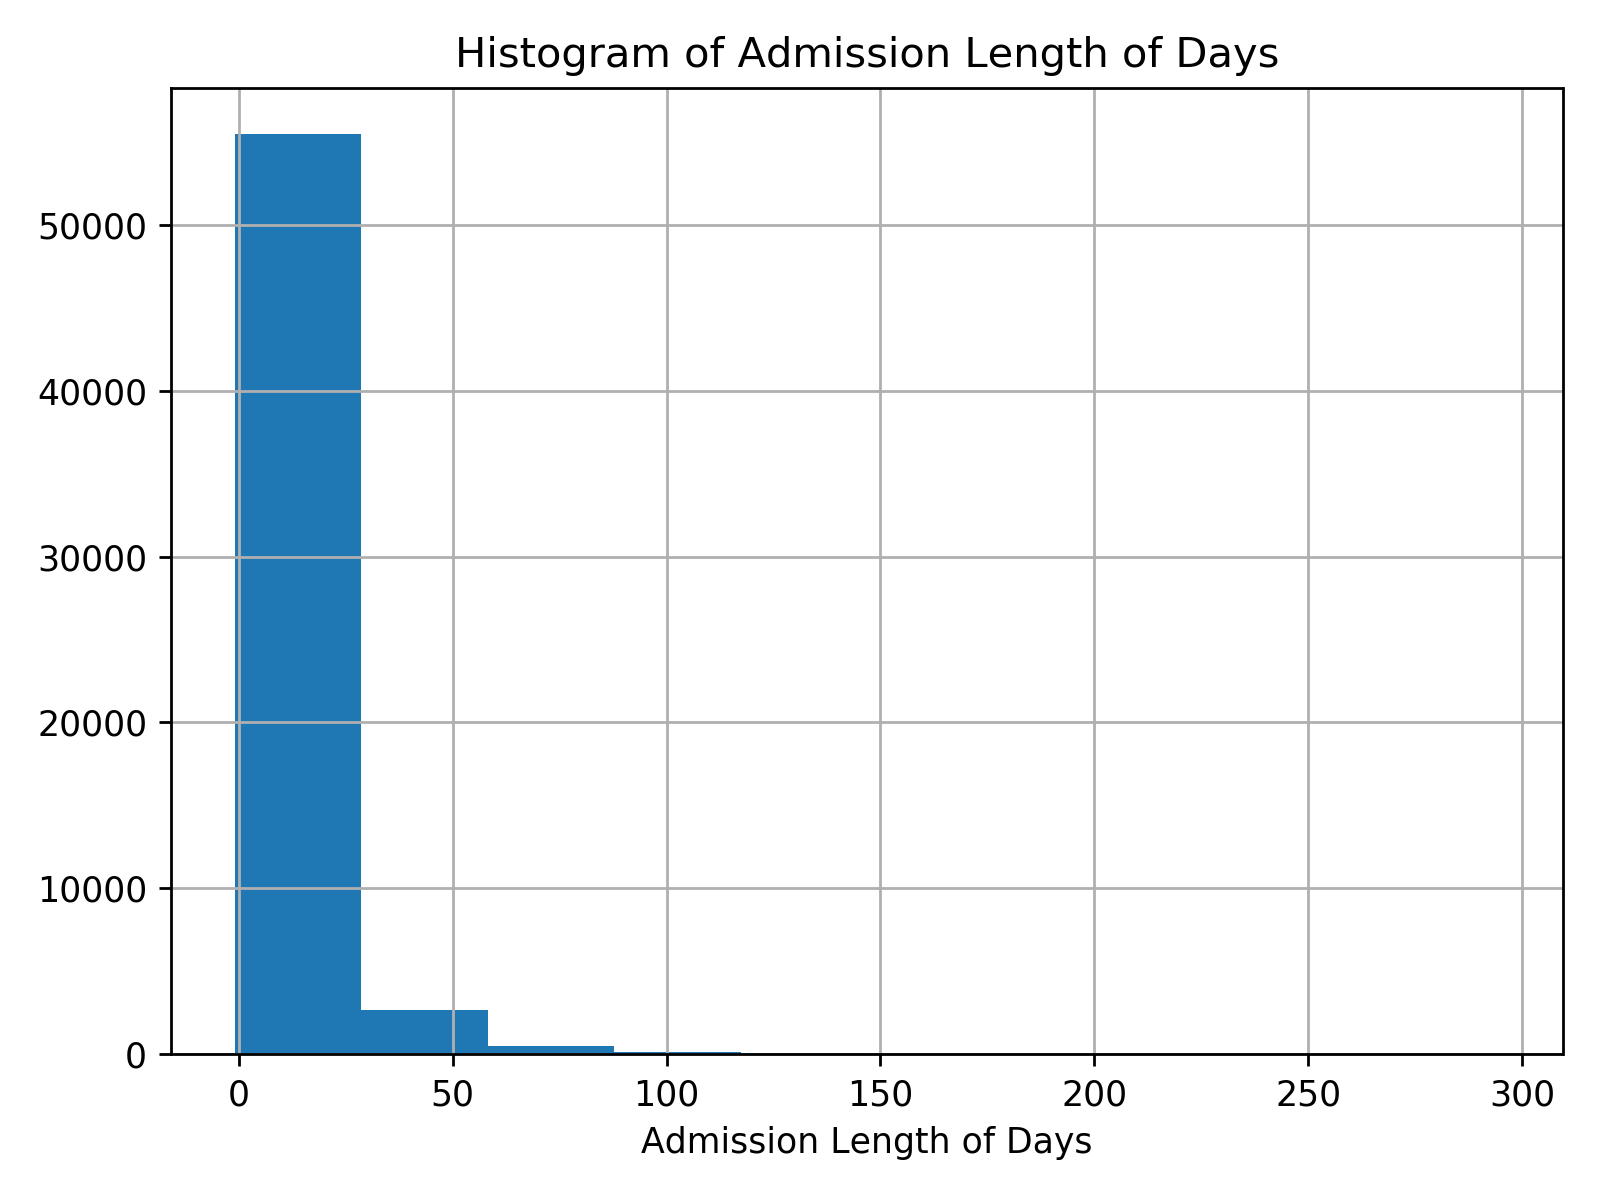

In [8]:
#3(g)
hospital.AdmissionLengthDays.hist()
plt.title('Histogram of Admission Length of Days')
plt.xlabel('Admission Length of Days')
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


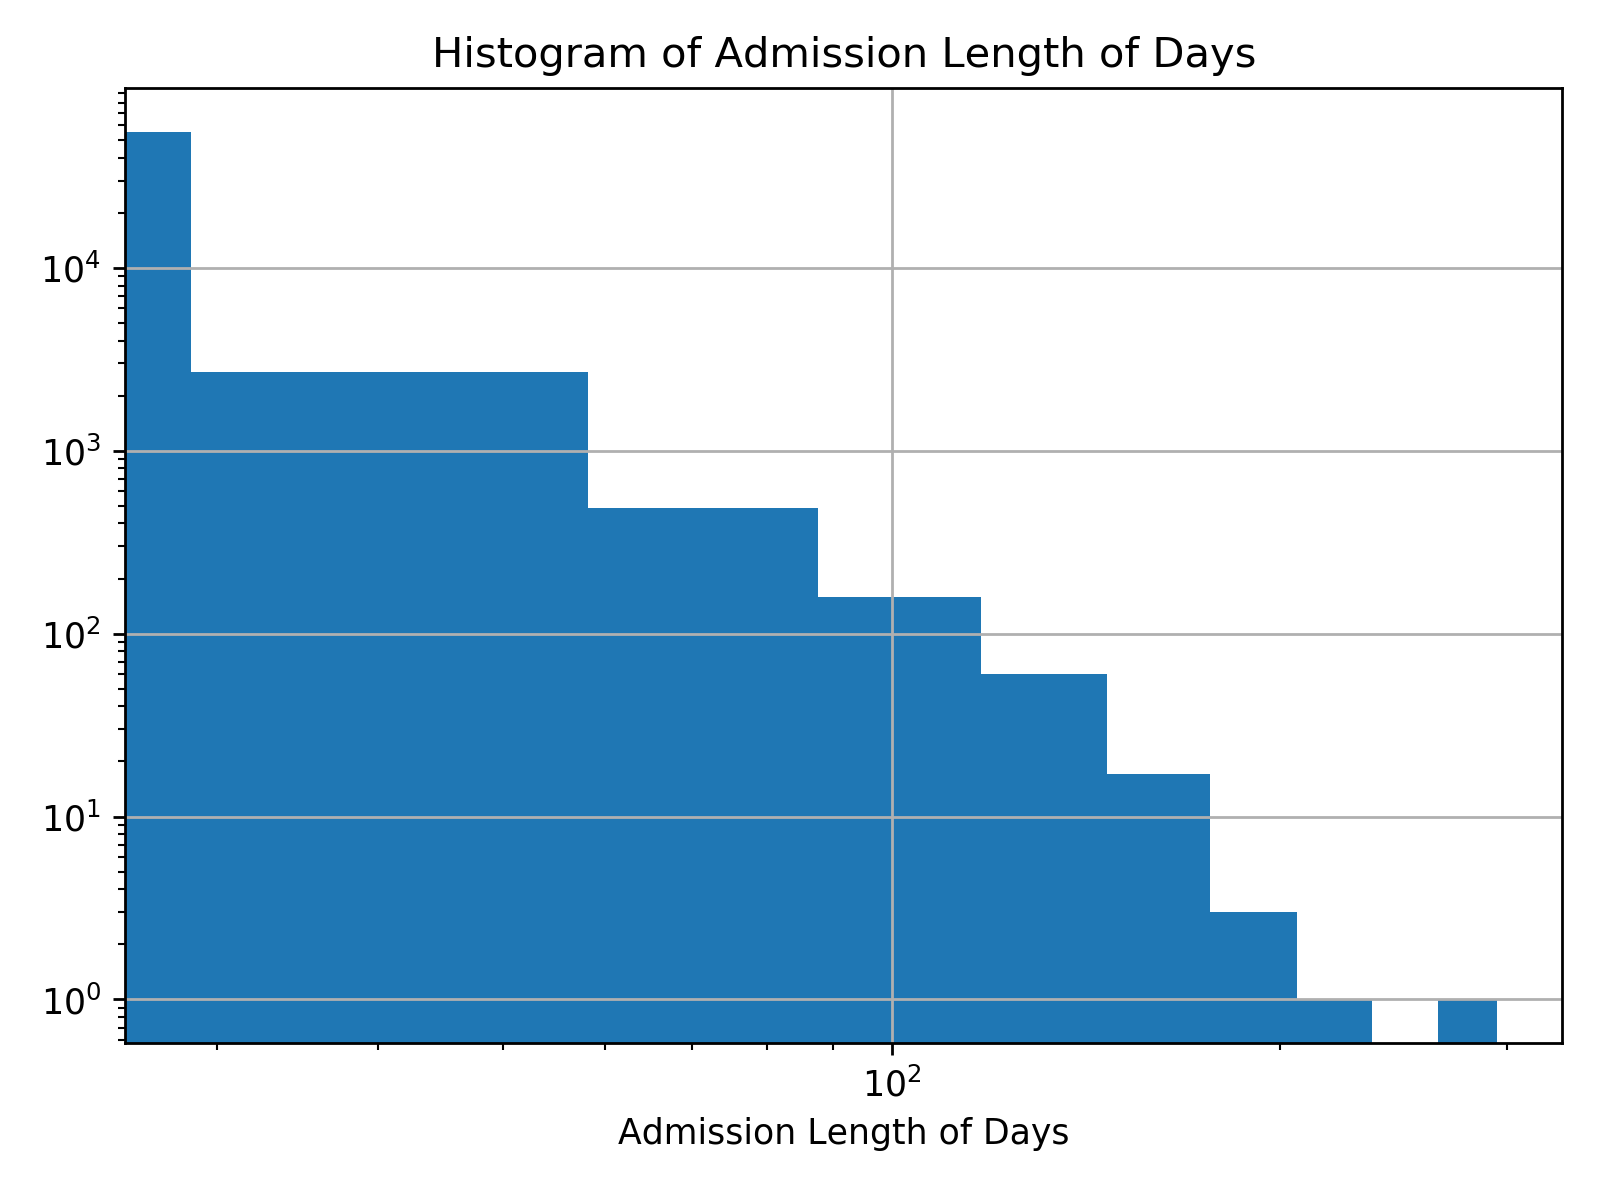

In [9]:
#3(g) histogram with logs
# I see that when using log scale, it is easier to see the distribution rather than not, as without log, it is very concentrated to a certain point in x-axis.
# I see that the length of admission is highest around 0-30 days
hospital.AdmissionLengthDays.hist()
plt.title('Histogram of Admission Length of Days')
plt.xlabel('Admission Length of Days')
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


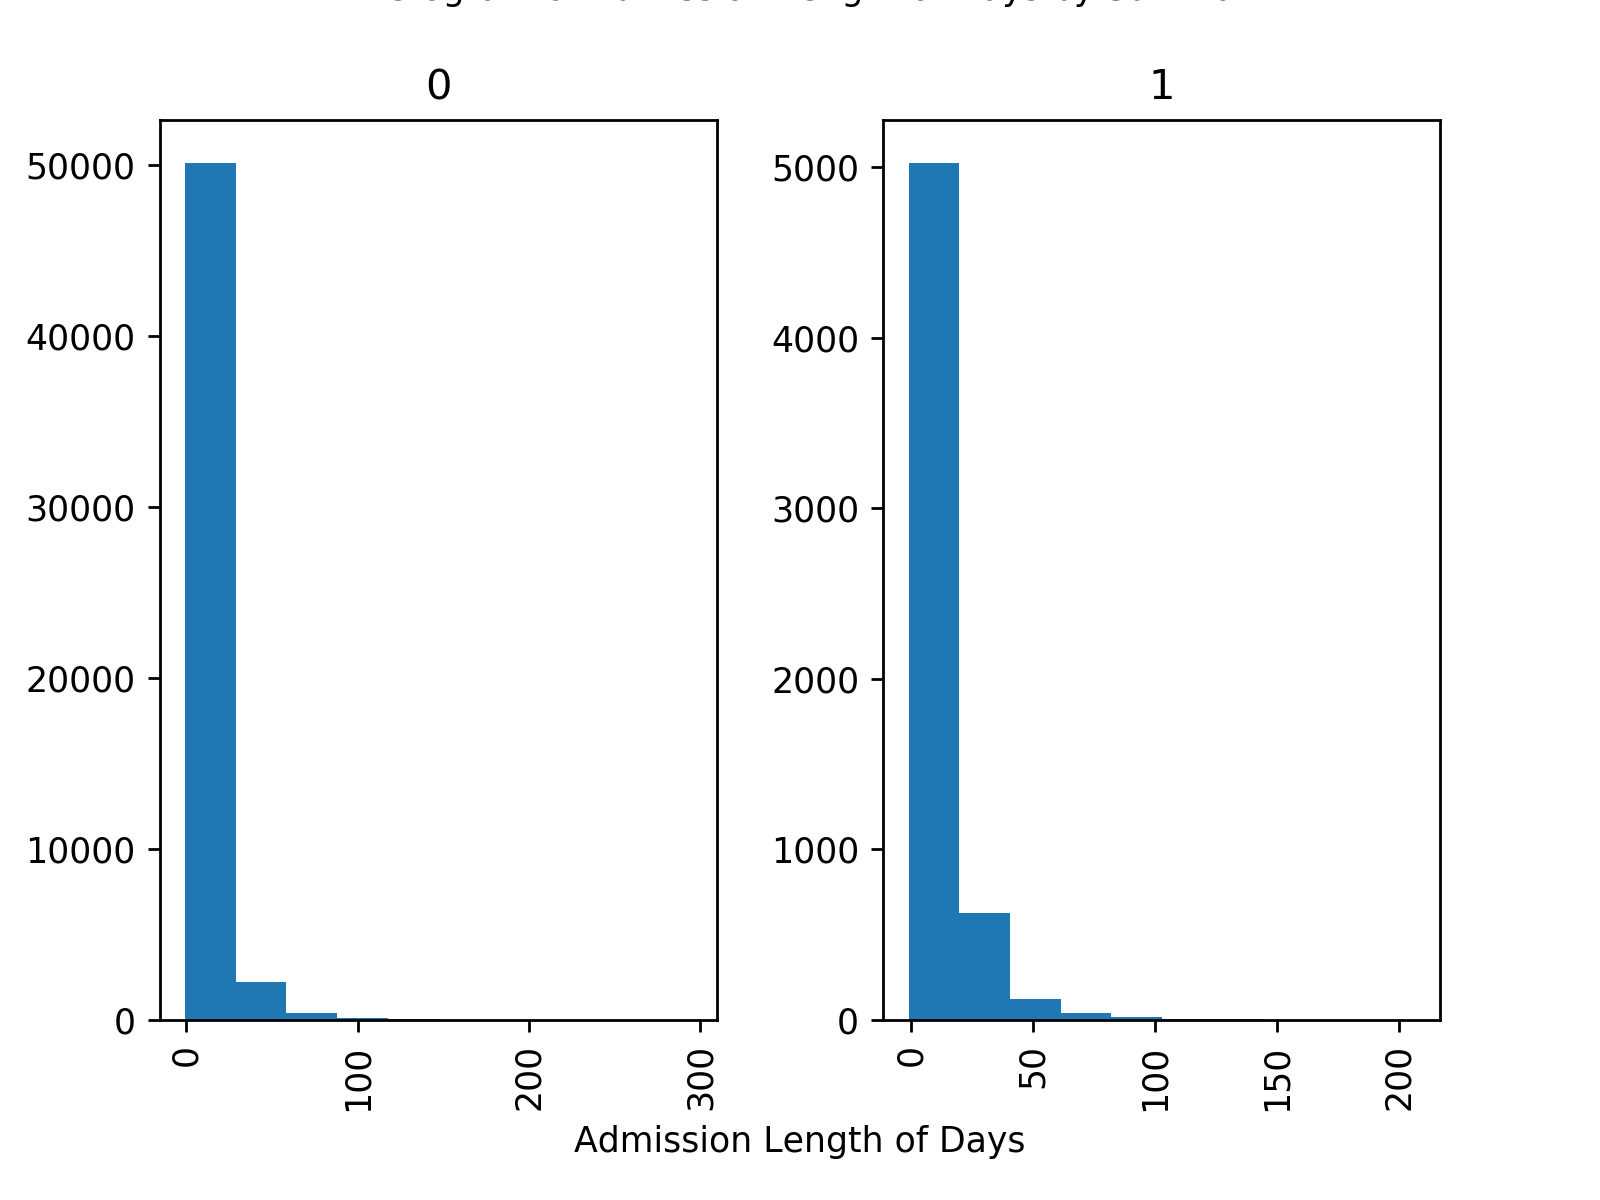

In [10]:
#3(h)
fig, axes = plt.subplots(1,2) 

hospital.hist(column='AdmissionLengthDays', by=hospital.Death_1, ax=axes)

fig.text(0.5, 1, 'Histogram of Admission Length of Days by Survival', ha='center')
fig.text(0.5, 0.04, 'Admission Length of Days', ha='center')
plt.show()

In [13]:
#3(i) from this, we can see data of death in each insurance type
hospitalDeathInsurance = pd.crosstab(hospital.Death_1, hospital.Insurance_Type)
print(hospitalDeathInsurance)

Insurance_Type  government  medicaid  medicare  private  self pay
Death_1                                                          
0                     1691      5400     24253    21152       515
1                       90       381      3904     1382        95
